In [85]:
from PIL import Image
import matplotlib.pyplot as plt 
import torch 
import numpy as np
import torchvision
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

%matplotlib inline

In [86]:
trans = transforms.Compose([transforms.Resize((100, 100)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5,), (0.5,))
                            ])

trainset = torchvision.datasets.ImageFolder(root = 'D:\git_space\TIL\Deep-Learning\my_data\instrument', transform = trans)

In [87]:
trainset.__getitem__(10)

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 1)

In [88]:
len(trainset)

30

In [89]:
classes = trainset.classes
classes

['harp', 'piano', 'violin']

In [90]:
trainloader = DataLoader(trainset,
                        batch_size=16,
                        shuffle=False,
                        num_workers=4)

In [91]:
images, labels = next(iter(trainloader))
print(labels)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])


In [92]:
def imshow(img):
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))

    print(np_img.shape)
    print((np.transpose(np_img, (1, 2, 0))).shape)

torch.Size([16, 3, 100, 100])
(3, 410, 410)
(410, 410, 3)
torch.Size([16, 3, 100, 100])
torch.Size([3, 206, 818])
 harp  harp  harp  harp  harp  harp  harp  harp  harp  harp piano piano piano piano piano piano 


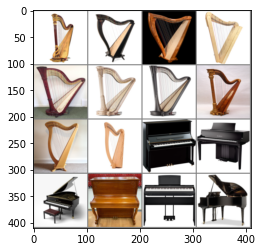

In [93]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print(''.join('%5s '%classes[labels[j]] for j in range(16)))

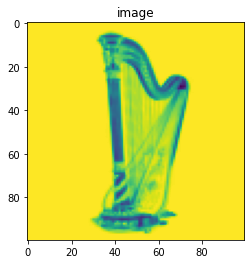

In [94]:
plt.title('image')
plt.imshow(images[0, 0, :, :])
plt.show()

In [95]:
layer = nn.Conv2d(3, 20, 15, 1).to(torch.device('cpu'))
layer

Conv2d(3, 20, kernel_size=(15, 15), stride=(1, 1))

In [96]:
output_data = layer(images)
output_data = output_data.data 
output = output_data.cpu().numpy()

In [97]:
output.shape

(16, 20, 86, 86)

In [98]:
weight = layer.weight
weight = weight.detach().numpy()

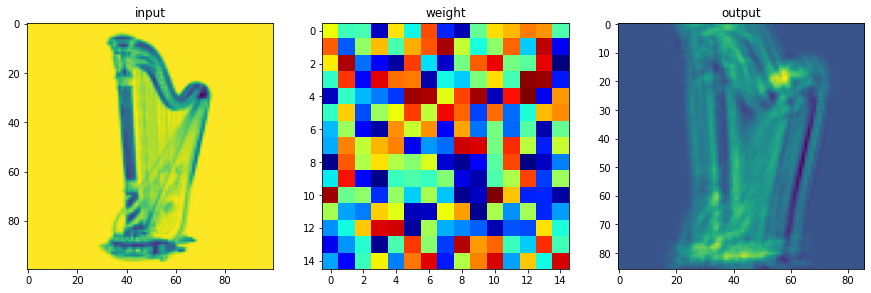

In [99]:
plt.figure(figsize=(15, 30))
plt.subplot(131)
plt.title('input')
plt.imshow(images[0, 0, :, :])
plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title('output')
plt.imshow(output[0, 0, :, :])

In [100]:
output = torch.from_numpy(output)

In [101]:
pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([16, 20, 43, 43])

In [102]:
pool_arr = pool.numpy()

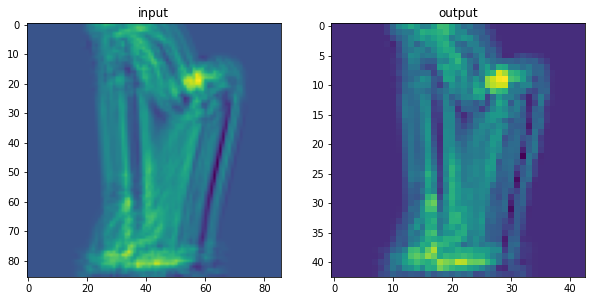

In [103]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title('input')
plt.imshow(output[0, 0, :, :])
plt.subplot(122)
plt.title('output')
plt.imshow(pool_arr[0, 0, :, :])
plt.show()

In [104]:
pool_arr = torch.from_numpy(pool_arr)
pool_arr.shape

torch.Size([16, 20, 43, 43])

In [105]:
flatten = pool_arr.view(16, 20 * 43 * 43)
flatten.shape

torch.Size([16, 36980])

In [106]:
lin = nn.Linear(36980, 3)(flatten)
lin.shape

torch.Size([16, 3])

In [107]:
lin

tensor([[-0.0117, -0.2602, -0.2216],
        [ 0.5254,  0.1318, -0.4364],
        [-0.3873, -0.1316,  0.3156],
        [ 0.0740,  0.0038, -0.4854],
        [ 0.1864, -0.1315, -0.2406],
        [ 0.0843, -0.0208, -0.2627],
        [ 0.0530,  0.0203, -0.3161],
        [ 0.0979,  0.0379, -0.1406],
        [ 0.3550, -0.2356, -0.1992],
        [-0.0146,  0.1383, -0.3832],
        [ 0.1545,  0.0819,  0.0724],
        [-0.1270,  0.1356,  0.1631],
        [ 0.3214,  0.2836, -0.0309],
        [ 0.2214, -0.1221,  0.0745],
        [-0.0197, -0.0956, -0.2029],
        [ 0.0561, -0.1524, -0.2327]], grad_fn=<AddmmBackward>)

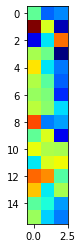

In [108]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.show()

In [109]:
with torch.no_grad():
    flatten = pool_arr.view(16, 20 * 43 * 43)
    lin = nn.Linear(36980, 3)(flatten)
    softmax = F.softmax(lin, dim=1)

In [110]:
softmax

tensor([[0.4396, 0.2934, 0.2671],
        [0.3950, 0.3233, 0.2816],
        [0.3195, 0.3272, 0.3532],
        [0.4288, 0.2973, 0.2739],
        [0.3301, 0.3438, 0.3261],
        [0.4365, 0.3190, 0.2445],
        [0.4052, 0.3389, 0.2559],
        [0.4189, 0.2947, 0.2864],
        [0.4048, 0.3127, 0.2826],
        [0.4739, 0.2582, 0.2679],
        [0.3638, 0.3052, 0.3310],
        [0.3082, 0.3061, 0.3856],
        [0.5340, 0.2589, 0.2072],
        [0.3814, 0.3433, 0.2753],
        [0.5283, 0.2026, 0.2691],
        [0.4269, 0.2497, 0.3234]])

In [111]:
np.mean(softmax.numpy()[:, 0])

0.41218162

In [112]:
np.mean(softmax.numpy()[:, 1])

0.29839087

In [113]:
np.mean(softmax.numpy()[:, 2])

0.28942752